In [1]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 23.1 MB/s eta 0:00:00


In [6]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from catboost import CatBoostClassifier
from scipy.stats import norm

In [3]:
# Загрузка датасета
bc_data = load_breast_cancer()
X = pd.DataFrame(bc_data.data, columns=bc_data.feature_names)
y = pd.Series(bc_data.target, name="target")

y *= -1
y += 1
y.sum() # 1 - злокачественная, 0 - доброкачественная
# Class distribution: 357 benign, 212 malignant

212

In [4]:
X.shape

(569, 30)

In [5]:
# Нормализация данных для Logistic Regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# 1. Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

print("Random Forest:")
print("Accuracy: {:.4f} ± {:.4f}".format(rf_cv_scores.mean(), rf_cv_scores.std()))

Random Forest:
Accuracy: 0.9561 ± 0.0228


In [8]:
# 2. Logistic Regression с нормализованными данными
logreg_model = LogisticRegression(max_iter=10000, random_state=42)
logreg_cv_scores = cross_val_score(logreg_model, X_scaled, y, cv=5, scoring='accuracy')

print("Logistic Regression (with normalization):")
print("Accuracy: {:.4f} ± {:.4f}".format(logreg_cv_scores.mean(), logreg_cv_scores.std()))


Logistic Regression (with normalization):
Accuracy: 0.9807 ± 0.0065


In [9]:
# 3. CatBoost с улучшенными параметрами
catboost_model = CatBoostClassifier(
    iterations=2000,         # Увеличение количества итераций
    learning_rate=0.05,      # Уменьшение скорости обучения
    depth=8,                 # Увеличение глубины деревьев
    l2_leaf_reg=3,           # Регуляризация L2 для предотвращения переобучения
    bagging_temperature=1.0, # Использование bagging для улучшения обобщающей способности
    verbose=0,               # Отключение вывода
    random_seed=42
)

catboost_cv_scores = cross_val_score(catboost_model, X, y, cv=5, scoring='accuracy')
print("CatBoost:")
print("Accuracy: {:.4f} ± {:.4f}".format(catboost_cv_scores.mean(), catboost_cv_scores.std()))

CatBoost:
Accuracy: 0.9701 ± 0.0131


In [10]:
# Gauss classic

In [11]:
def Gaus_neuron_hard(df, n, S_):

    brdrs_ar = np.zeros((df.shape[1], n))

    for indx, col in enumerate(df.columns):

        vol = df[col].values
        min_ = np.min(vol)
        max_ = np.max(vol)

        s_tst = ((max_ - min_) * (1 /(n-1)) + min_) - ((max_ - min_) * (0 /(n-1)) + min_)

        for i in range(n):
            loc = (max_ - min_) * (i /(n-1)) + min_
            brdrs_ar[indx, i] = loc

        hard_enc_G = (vol.reshape(-1, 1) - np.tile(brdrs_ar[indx, :], (X.shape[0], 1))) ** 2 / (S_ ** 2)

        if indx == 0:
            hard_G_Total = hard_enc_G.copy()
        else:
            hard_G_Total = np.hstack((hard_G_Total, hard_enc_G))

    return hard_G_Total, brdrs_ar

In [12]:
Final_df_HARD = Gaus_neuron_hard(X, 30, 0.6)[0]
Final_df_HARD = np.exp(-Final_df_HARD)
Final_df_HARD = np.where(Final_df_HARD < 0.01, 0, Final_df_HARD)
Final_df_HARD *= 10
Final_df_HARD = np.round(Final_df_HARD)
Final_df_HARD = pd.DataFrame(Final_df_HARD)
Final_df_HARD

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
3,0.0,0.0,0.0,0.0,0.0,2.0,10.0,3.0,0.0,0.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.0
565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.0
566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


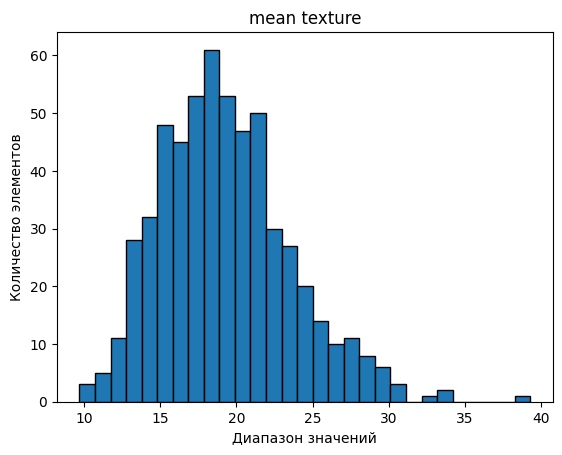

In [13]:
k = 1

# Подсчёт элементов в каждом бакете
hist, bin_edges = np.histogram(X.iloc[:,k].values, bins = Gaus_neuron_hard(X, 30, 0.6)[1][k])

# Построение гистограммы
plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), edgecolor='black', align='edge')

# Настройка осей
plt.xlabel('Диапазон значений')
plt.ylabel('Количество элементов')
plt.title(f'{X.columns[k]}')

# Показать график
plt.show()

In [14]:
# Нормализация данных для Logistic Regression
scaler_G_HARD = StandardScaler()
X_train_scaled_G_HARD = scaler_G_HARD.fit_transform(Final_df_HARD)

In [15]:
Final_df_HARD.shape

(569, 900)

In [16]:
# 1. Random Forest
rf_model_G_HARD = RandomForestClassifier(random_state=42)
rf_cv_scores_G_HARD = cross_val_score(rf_model_G_HARD, Final_df_HARD, y, cv=5, scoring='accuracy')

print("Random Forest:")
print("Accuracy: {:.4f} ± {:.4f}".format(rf_cv_scores_G_HARD.mean(), rf_cv_scores_G_HARD.std()))

Random Forest:
Accuracy: 0.9385 ± 0.0228


In [17]:
# 2. Logistic Regression с нормализованными данными
logreg_model_G_HARD = LogisticRegression(max_iter=10000, random_state=42)
logreg_cv_scores_G_HARD = cross_val_score(logreg_model_G_HARD, scaler_G_HARD.fit_transform(Final_df_HARD), y, cv=5, scoring='accuracy')

print("Logistic Regression (with normalization):")
print("Accuracy: {:.4f} ± {:.4f}".format(logreg_cv_scores_G_HARD.mean(), logreg_cv_scores_G_HARD.std()))

Logistic Regression (with normalization):
Accuracy: 0.9578 ± 0.0179


In [18]:
# 3. CatBoost с улучшенными параметрами
catboost_model_G_HARD = CatBoostClassifier(
    iterations=2000,         # Увеличение количества итераций
    learning_rate=0.05,      # Уменьшение скорости обучения
    depth=8,                 # Увеличение глубины деревьев
    l2_leaf_reg=3,           # Регуляризация L2 для предотвращения переобучения
    bagging_temperature=1.0, # Использование bagging для улучшения обобщающей способности
    verbose=0,               # Отключение вывода
    random_seed=42
)
catboost_cv_scores_G_HARD = cross_val_score(catboost_model_G_HARD, Final_df_HARD, y, cv=5, scoring='accuracy')

print("CatBoost:")
print("Accuracy: {:.4f} ± {:.4f}".format(catboost_cv_scores_G_HARD.mean(), catboost_cv_scores_G_HARD.std()))

CatBoost:
Accuracy: 0.9473 ± 0.0235


In [20]:
# ADVANCE GAUSS ENCODING

def calculate_quantile_bounds(data, num_quantiles):

    data = np.asarray(data)
    quantile_bounds = np.quantile(data, q = np.linspace(0, 1, num_quantiles))# + 1

    return quantile_bounds

In [21]:
def hard_transform(ci_ar, x_ar):

    N_ci = ci_ar.shape[0]
    test_init = np.digitize(x_ar, ci_ar, right = True).reshape(-1, 1)
    test = test_init.copy()

    pi_ar = np.ones((x_ar.shape[0], ci_ar.shape[0]))

    ind_min_x = np.unique(np.where(test_init == 0)[0])
    ind_max_x = np.unique(np.where(test_init == ci_ar.shape[0])[0])
    pi_ar[ind_min_x] = np.arange(ci_ar.shape[0])
    pi_ar[ind_max_x] = np.flip(np.arange(ci_ar.shape[0]))

    ind_oth = np.setdiff1d(np.arange(len(x_ar)), np.hstack((ind_min_x, ind_max_x)))

    right_b = ci_ar[test_init[ind_oth].flatten()]
    left_b = ci_ar[test_init[ind_oth].flatten() - 1]

    left_d = (x_ar[ind_oth] - left_b) / (right_b - left_b )
    right_d = (- x_ar[ind_oth] + right_b) / (right_b - left_b )

    pi_ar[ind_oth, test_init[ind_oth].flatten()] = right_d
    pi_ar[ind_oth, test_init[ind_oth].flatten() - 1] = left_d

    mask = pi_ar[ind_oth] != 1
    left_non_one = np.argmax(mask, axis=1)
    right_non_one = pi_ar[ind_oth].shape[1] - 1 - np.argmax(mask[:, ::-1], axis=1)

    for i, _idx in enumerate(ind_oth):
        csum_ = np.cumsum(pi_ar[_idx, right_non_one[i]:])
        pi_ar[_idx, right_non_one[i]:] = csum_

    for i, _idx in enumerate(ind_oth):
        csum_ = np.cumsum(pi_ar[_idx, :left_non_one[i]+1][::-1])[::-1]
        pi_ar[_idx, : left_non_one[i] + 1] = csum_

    return pi_ar

In [22]:
def Gaus_neuron_hard_AD(df, n, S_):

    brdrs_ar = np.zeros((df.shape[1], n))

    for indx, col in enumerate(df.columns):

        vol = df[col].values
        min_ = np.min(vol)
        max_ = np.max(vol)

        quantile_bounds = calculate_quantile_bounds(vol, n)
        brdrs_ar[indx, :] = quantile_bounds

        hard_enc_G = (hard_transform(quantile_bounds, vol)) ** 2 / (S_ ** 2)

        if indx == 0:
            hard_G_Total = hard_enc_G.copy()
        else:
            hard_G_Total = np.hstack((hard_G_Total, hard_enc_G))

    return hard_G_Total, brdrs_ar

In [23]:
Final_df_HARD_AD = Gaus_neuron_hard_AD(X, 30, 0.6)[0]
Final_df_HARD_AD = np.exp(-Final_df_HARD_AD)
Final_df_HARD_AD = np.where(Final_df_HARD_AD < 0.01, 0, Final_df_HARD_AD)
Final_df_HARD_AD *= 10
Final_df_HARD_AD = np.round(Final_df_HARD_AD)
Final_df_HARD_AD = pd.DataFrame(Final_df_HARD_AD)
Final_df_HARD_AD

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,4.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,10.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,6.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,0.0


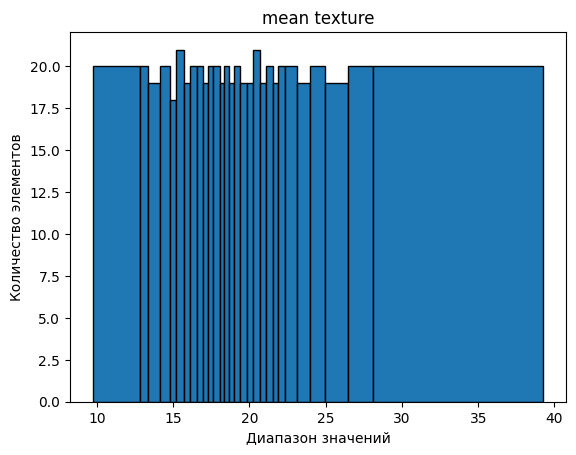

In [24]:
k = 1

# Подсчёт элементов в каждом бакете
hist, bin_edges = np.histogram(X.iloc[:,k].values, bins = Gaus_neuron_hard_AD(X, 30, 0.6)[1][k])

# Построение гистограммы
plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), edgecolor='black', align='edge')

# Настройка осей
plt.xlabel('Диапазон значений')
plt.ylabel('Количество элементов')
plt.title(f'{X.columns[k]}')

# Показать график
plt.show()

In [25]:
# Нормализация данных для Logistic Regression
scaler_G_HARD_AD = StandardScaler()
X_train_scaled_G_HARD_AD = scaler_G_HARD_AD.fit_transform(Final_df_HARD_AD)

In [26]:
# 1. Random Forest
rf_model_G_HARD_AD = RandomForestClassifier(random_state=42)
rf_cv_scores_G_HARD_AD = cross_val_score(rf_model_G_HARD_AD, Final_df_HARD_AD, y, cv=5, scoring='accuracy')

print("Random Forest:")
print("Accuracy: {:.4f} ± {:.4f}".format(rf_cv_scores_G_HARD_AD.mean(), rf_cv_scores_G_HARD_AD.std()))

Random Forest:
Accuracy: 0.9333 ± 0.0269


In [27]:
# 2. Logistic Regression с нормализованными данными
logreg_model_G_HARD_AD = LogisticRegression(max_iter=10000, random_state=42)
logreg_cv_scores_G_HARD_AD = cross_val_score(logreg_model_G_HARD_AD, scaler.fit_transform(Final_df_HARD_AD), y, cv=5, scoring='accuracy')

print("Logistic Regression (with normalization):")
print("Accuracy: {:.4f} ± {:.4f}".format(logreg_cv_scores_G_HARD_AD.mean(), logreg_cv_scores_G_HARD_AD.std()))

Logistic Regression (with normalization):
Accuracy: 0.9526 ± 0.0162


In [28]:
# 3. CatBoost с улучшенными параметрами
catboost_model_G_HARD_AD = CatBoostClassifier(
    iterations=2000,         # Увеличение количества итераций
    learning_rate=0.05,      # Уменьшение скорости обучения
    depth=8,                 # Увеличение глубины деревьев
    l2_leaf_reg=3,           # Регуляризация L2 для предотвращения переобучения
    bagging_temperature=1.0, # Использование bagging для улучшения обобщающей способности
    verbose=0,               # Отключение вывода
    random_seed=42
)
catboost_cv_scores_G_HARD_AD = cross_val_score(catboost_model_G_HARD_AD, Final_df_HARD_AD, y, cv=5, scoring='accuracy')

print("CatBoost:")
print("Accuracy: {:.4f} ± {:.4f}".format(catboost_cv_scores_G_HARD_AD.mean(), catboost_cv_scores_G_HARD_AD.std()))

CatBoost:
Accuracy: 0.9403 ± 0.0285
